# 531 - Lab 2 - EDA on movie data

In this lab we will be using both R and Python,
and for each question you will develop an answer both in `ggplot` and in `Altair`.
Although the `%%R` cell magic makes it convenient for us to do this in the same notebook,
I would still recommend that you use a separate Jupyter Notebook with a dedicated R kernel
or RStudio to develop your R code.
The reasons for this are that autocompletion works better there
and the error messages are easier to understand.
Once you have developed the code for a question
you can paste it into the corresponding R cell here
and make sure it runs and shows up in the exported HTML.

If your `rpy2` does not work,
you can paste in entire cells from an R-kernel including the output plots,
or you can submit a different notebook on GitHub for the R part,
but you must write this in the canvas comments
or next to your repo link in this notebook so that the TAs know when they grade.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Either manually or using the last cell of this notebook.</li>
    </ul>
  </li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

YOUR REPO LINK GOES HERE

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
#import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
#alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

Error importing in API mode: ImportError("dlopen(/opt/anaconda3/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <B96A8100-FA7A-3EFC-8726-931D26646DE6> /opt/anaconda3/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.


# 0. Get motivated!

I have heard that the movie market is a lucrative business,
and have been looking into starting my own online streaming service
together with a few friends.
Before we do this,
we need to understand the movie market better so that we can get a competitive edge
over existing service.
I have been looking all over for an aspiring data wrangler and future VIZARD,
but haven't been able to track one down.
This is where you come in!

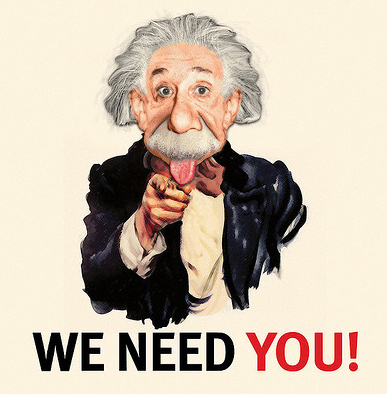

Together,
we must understand the current movie market,
which companies produces what kind of movies,
and which receive good scores.
Then we can have the best movies on our platform and show only those, easy right?
I mean...we will show only good movies, I can't believe no one has thought of this before!
I have already identified a unique name for this service: Bestflix™.

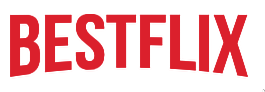

Don't worry,
we're in this together and I will be helping you with the wrangling throughout most exercises
if you take charge of the viz part, deal?.
Also,
I have never failed to start a company before,
so you're in good hands.
I can already smell the `$$$`,
so let's get started!

In this notebook,
we will focus on Exploratory Data Analysis (EDA),
both for single numerical columns, pairwise numerical columns,
numerical columns conditioned on categorical columns and combinations of categorical columns.

# 1. Single numerical columns

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,accuracy:1}

<h4>Python</h4>
<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot. I uploaded the data for this lab to <a href="https://ubcca-my.sharepoint.com/:f:/g/personal/joel_ostblom_ubc_ca/EkFLZO7xmNdEk25yZXxznfYBWVsxgd4VtE7U5XI33A7n6Q?e=G7PiUb">my MDS OneDrive folder</a>, since that is what seems to work best for most students to download from. Download the file <code>lab2-movies.json</code> to your computer first, and then read it in using pandas. Using dataframe methods, do the following in three different cells:</p>
<ol>
<li>Display the first few and last few rows of the data.</li>
<li>Display info about all columns, data types, and number of NaN values.</li>
<li>Display a summary description of the data frame's numerical columns.</li>
</ol>
 
</div>

In [ ]:
# YOUR ANSWER GOES HERE

In [ ]:
# YOUR ANSWER GOES HERE

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-success" style="color:black">

### Question 1.2
rubric={reasoning:1,accuracy:1}

<h4>R</h4>
<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot. I uploaded the data for this lab to <a href="https://ubcca-my.sharepoint.com/:f:/g/personal/joel_ostblom_ubc_ca/EkFLZO7xmNdEk25yZXxznfYBWVsxgd4VtE7U5XI33A7n6Q?e=G7PiUb">my MDS OneDrive folder</a>, since that is what seems to work best for most students to download from.  Download the file <code>lab2-movies.json</code> to your computer first, and then run the code for reading in the data that I have provided below. Then do the following in three different cells:</p>
    
<ol>
<li>Display the first few rows of the data.</li>
<li>Display info about all columns, including their data types.</li>
<li>Display a summary description of the data frame's numerical columns only.</li>
</ol>
 
</div>

In [3]:
%%R
library(rjson)
library(tidyverse)

json_txt <- paste(readLines("/Users/spandandey/Desktop/courses/Data 550/DATA_550_lab_group21/lab2/lec-movies.json",
                           warn = FALSE),
                  collapse = "")

movies_raw <- fromJSON(json_txt)
movies_tbl <- as_tibble(movies_raw)

movies <- movies_tbl %>%
  unnest(where(is.list), keep_empty = TRUE)


# YOUR ANSWER GOES HERE
head(movies)

# A tibble: 6 × 11
     id title runtime budget revenue genres countries vote_average vote_loved_it
  <dbl> <chr>   <dbl>  <dbl>   <dbl> <chr>  <chr>            <dbl>         <dbl>
1    12 Find…     100 9.40e7  9.40e8 Anima… United S…         3.86         0.322
2    22 Pira…     143 1.4 e8  6.55e8 Fanta… United S…         3.81         0.32 
3    35 The …      87 7.5 e7  5.27e8 Anima… United S…         3.44         0.155
4    58 Pira…     151 2   e8  1.07e9 Fanta… United S…         3.47         0.198
5    75 Mars…     106 7   e7  1.01e8 Fanta… United S…         2.96         0.086
6   117 The …     119 2.5 e7  7.63e7 Histo… United S…         3.88         0.268
# ℹ 2 more variables: vote_count <dbl>, vote_std <dbl>


In [5]:
%%R
# YOUR ANSWER GOES HERE
glimpse(movies)

Rows: 831
Columns: 11
$ id            <dbl> 12, 22, 35, 58, 75, 117, 118, 118, 120, 121, 122, 123, 1…
$ title         <chr> "Finding Nemo", "Pirates of the Caribbean: The Curse of …
$ runtime       <dbl> 100, 143, 87, 151, 106, 119, 115, 115, 178, 179, 201, 13…
$ budget        <dbl> 9.40e+07, 1.40e+08, 7.50e+07, 2.00e+08, 7.00e+07, 2.50e+…
$ revenue       <dbl> 940335536, 655011224, 527068851, 1065659812, 101371017, …
$ genres        <chr> "Animation", "Fantasy", "Animation", "Fantasy", "Fantasy…
$ countries     <chr> "United States of America", "United States of America", …
$ vote_average  <dbl> 3.86, 3.81, 3.44, 3.47, 2.96, 3.88, 3.23, 3.23, 4.10, 4.…
$ vote_loved_it <dbl> 0.322, 0.320, 0.155, 0.198, 0.086, 0.268, 0.130, 0.130, …
$ vote_count    <dbl> 33887, 36337, 8621, 15079, 19515, 17628, 11606, 11606, 5…
$ vote_std      <dbl> 0.87, 0.91, 0.92, 0.98, 1.10, 0.78, 1.01, 1.01, 0.99, 0.…


In [6]:
%%R
# YOUR ANSWER GOES HERE
movies%>%
select(where(is.numeric))%>%
summary()

       id            runtime          budget             revenue         
 Min.   :    12   Min.   : 26.0   Min.   :        8   Min.   :1.600e+01  
 1st Qu.:  4960   1st Qu.: 92.5   1st Qu.: 25000000   1st Qu.:3.817e+07  
 Median : 11202   Median :104.0   Median : 55000000   Median :1.147e+08  
 Mean   : 54659   Mean   :109.8   Mean   : 70965024   Mean   :2.342e+08  
 3rd Qu.: 50891   3rd Qu.:124.0   3rd Qu.:100000000   3rd Qu.:3.165e+08  
 Max.   :402298   Max.   :248.0   Max.   :380000000   Max.   :2.788e+09  
  vote_average   vote_loved_it      vote_count       vote_std    
 Min.   :0.630   Min.   :0.0000   Min.   :    5   Min.   :0.230  
 1st Qu.:2.930   1st Qu.:0.0830   1st Qu.:  666   1st Qu.:0.930  
 Median :3.290   Median :0.1360   Median : 2102   Median :1.000  
 Mean   :3.234   Mean   :0.1601   Mean   : 6063   Mean   :1.008  
 3rd Qu.:3.590   3rd Qu.:0.2200   3rd Qu.: 6898   3rd Qu.:1.070  
 Max.   :4.270   Max.   :0.5470   Max.   :67662   Max.   :1.960  


<div class="alert alert-info" style="color:black">

### Question 1.3
rubric={viz:1,accuracy:1}

<h4>Python</h4>
<p>Create a single histogram of a numerical column of your choice, choosing an appropriate number of bins and set the figure height to 100.</p>

</div>

In [ ]:
# YOUR ANSWER GOES HERE


<div class="alert alert-success" style="color:black">

### Question 1.4
rubric={viz:1,accuracy:1,reasoning:1}

<h4>R</h4>
<ol type="1">
<li><p>Create a single density estimate of a numerical column of your choice by using he density geom.</p></li>
<li><p>Try setting the <code>alpha</code> parameter to a float between 0 and 1 and the <code>fill</code> parameter to a color name as a string to get a shaded density, which I find visually appealing =) Set these inside the geom, not inside the aes function.</p></li>
<li><p>Do you think either of this density plot or the histogram in the previous exercise gives you a better understanding of the underlying data? Which one and why?</p></li>
</ol>


</div>

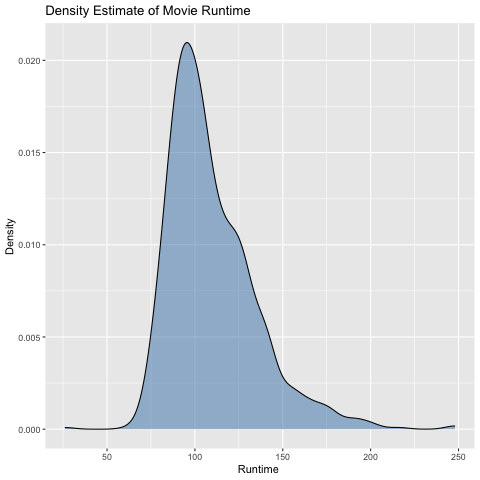

In [4]:
%%R
# YOUR ANSWER GOES HERE
library(ggplot2)
ggplot(movies,aes(
    x=runtime
))+geom_density(
    alpha=0.5,
    fill="steelblue"
)+labs(
    title = "Density Estimate of Movie Runtime",
    x = "Runtime ",
    y = "Density"
)




<div class="alert alert-info" style="color:black">

### Question 1.5
rubric={viz:2,accuracy:2}
    
<h4>Python</h4>
<ul>
    <li>Extract the column names from all numerical columns except <code>id</code> and save them to a variable as a list (the <code>.select_dtypes()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your histogram above and paste it here. Modify the code so it plots one histogram per numeric column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use the Altair approach to repeating charts instead (with the `repeat` keyword` rather than <code>row</code> or <codecolumn`).</li>
</ul>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-success" style="color:black">

### Question 1.6
rubric={viz:2,accuracy:2}
    
<h4>R</h4>
<ul>
    <li>Pipe the data fame's numerical columns (except <code>id</code>) into ggplot (the <code>.select_if()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your density plot above and paste it here. Modify the code so that it accepts the piped dataframe and plots one density estimate per column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use pivoting and faceting instead (example in the lecture videos).</li>
</ul>

</div>

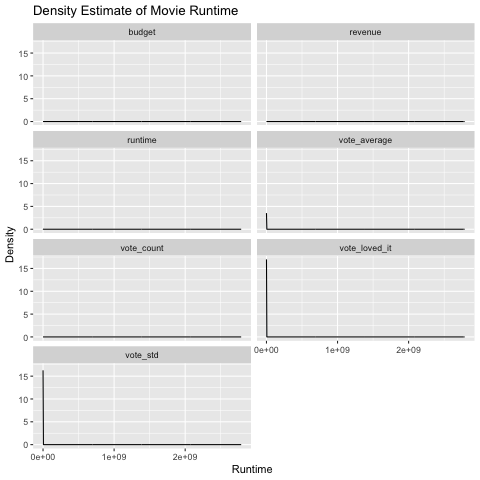

In [5]:
%%R
# YOUR ANSWER GOES HERE
movies%>%
select(-id)%>%
select_if(is.numeric)%>%
pivot_longer(
    cols = everything(),
    names_to = "variable",
    values_to = "value"
)%>%
ggplot(aes(
    x=value
))+geom_density(
    alpha=0.5,
    fill="steelblue"
)+labs(
    title = "Density Estimate of Movie Runtime",
    x = "Runtime ",
    y = "Density"
)+facet_wrap(~variable,ncol=2)

# 2. Pairwise numerical columns

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={viz:2,accuracy:2}
    
<h4>Python</h4>

<p>Next, let’s look at the relationships between pairs of numerical columns.For this we will create a scatterplot matrix (SPLOM) for all numerical columns except id.</p>
<ol type="1">
<li>I recommend starting with creating a single scatter plot and gradually substituting in the repeating columns.</li>
<li>Do not include zero on either axis unless the data actually starts at zero.</li>
<li>Reduce each subplots height and width to be able to see the entire lower diagonal in view.</li>
<li>Set the opacity and size of the points directly inside <code>mark_point()</code> in order for the plots to appear less saturated.</li>
<li>Configure the axes to remove or shrink the font of the axes labels (and optional reduce the axes titles' size). Plots don't have to look perfect during EDA, the point here is to pick up trends, not necessarily to read all labels.</li>
</ol>

You can <a href=https://altair-viz.github.io/gallery/scatter_matrix.html> study this example if you want guidance.</a>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-success" style="color:black">

### Question 2.2
rubric={viz:1,accuracy:1}
    
<h4>R</h4>

<p>Oh cra.. I mean: DONT PANIC! Everything is under control... ok let's try the same thing in R
Create a scatterplot matrix (SPLOM) of all numerical columns except <code>id</code>.</p>
<p>There is nothing built into <code>ggplot</code> for this but the <code>GGally</code> package has a handy <code>ggpairs</code> function for this, which also plots single column densities on the diagonal and correlation coefficients on the upper corner. Install this package an then use the <code>ggpairs</code>.</p>


</div>

In [ ]:
%%R
# YOUR ANSWER GOES HERE


<div class="alert alert-warning" style="color:black">

### Question 2.3 (Optional)
rubric={viz:0.5,accuracy:0.5}
    
<h4>Python</h4>
<p>Another way of viewing the pairwise relationships between numerical column is to assess their correlation coefficients. It can be a good idea to use spearman instead of pearson correlation in order to pick up nonlinearities, so make sure to use that below.</p>
<p>I have done most of the wrangling, but you need to fill in the one blank and then view the dataframe to figure out how to plot it. Use some type of point plot with a marker of your choice and make an informed decision of which encoding channels to map the different data frame columns to.</p>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

# corr_df = movies[numeric_cols].corr(________).stack().reset_index(name='corr')

<div class="alert alert-warning" style="color:black">

### Question 2.4 (Optional)
rubric={accuracy:0.5,reasoning:0.5}
    
<h4>R</h4>
    
<p>We're getting close, dont give up! Remember, we're in it for the <code>$$$</code></p>

<ol type="1">
<li>There is nothing built into <code>ggplot</code> for correlations but the <code>GGally</code> package has a handy <code>ggcorr</code> function we can use. You could also calculate it manually and use <code>geom_tile</code> if you prefer.</li>
<li>Compare this to the plot you made with Altair above. Which visualization do you prefer for viewing the correlation? Briefly explain why in &lt;90 words.</li>
</ol>

</div>

In [ ]:
%%R
# YOUR ANSWER GOES HERE

YOUR ANSWER TO #2 HERE

<div class="alert alert-warning" style="color:black">

### Question 2.5 (Optional)
rubric={viz:0.5,accuracy:0.5}
    
<h4>Python</h4>
<p>In the lecture, I mentioned hat 2D histograms is a good alternative when you scatter plots become oversaturated. Copy your code from 2.1 and change it so that we can see multiple “heatmap-like” 2D histograms instead of scatter plots.</p>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

# 3. EDA of numerical columns conditioned on a categorical column (genres)

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={viz:1,accuracy:1}

<h4>Python</h4>
<p>Lots of interesting variation in the histograms above! I wonder if some of it can be explained by movie genre or which studio made the film… This could be valuable information for Bestify™ so let’s find out!</p>
<p>We’ll start with the movie genres. If you look at the data frame, you can see that each film has multiple genres in a list. This is not ideal and mean we must make a decision if we are counting the film once per genre or once overall. Since we have no information about which is the main genres, I suggest we go ahead and count it once per genre. In order to do this we need to replicate each row once per genre in the genres column. Luckily there is a pandas method called <code>explode</code> for exactly this. I have already done the necessary wrangling here, but please view the df so that you understand what happens and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html">check out pandas doc for a simpler example</a>.</p>
<ol>
<li>Use this new dataframe and create multiple boxplots inside a single figure by have genres on the y-axis and revenue on the x axis.</li>
<li>Boxplots can only be sorted by passing an explicit list of the sort column, in this case the genres. I want you to sort the genres by median revenue, so that the median lines of the box plot are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. In the en you need a list that you can pass to <code>sort</code> inside <code>alt.Y()</code>.</li>
</ol>
<p>Once you have made the boxplot, you will see some interesting outliers. Remember that you can view what films these are by setting <code>tooltip='title'</code>, enjoy exploring!</p>
    
</div>

In [ ]:
# Uncomment and run these lines
# boom_genres = movies.explode('genres')
## Sorting by revenue because it is all about the money, money, money...
# genres_by_revenue = boom_genres.______('genres')['revenue'].______().___________().index._______()

# YOUR ANSWER GOES HERE 

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={viz:1,accuracy:2}
    
<h4>R</h4>
<p>Let's create a explosion in R as well. In the tidyverse, exploding a list / vector from a column is referred to as unnesting it, less action-packed but maybe even more descriptive? =)</p>
    
<p>I have already done the necessary wrangling here, but please view the df so that you understand what happened and <a href="https://tidyr.tidyverse.org/reference/nest.html">check out tidyr doc for a simpler example</a>.</p>
    
<ol type="1">
<li>Use this new dataframe and create multiple violinplots inside a single figure by having genres on the y-axis and revenue on the x axis.</li>
<li>Read the documentation of the violin plot to find out how you can use its parameters to add a line for the median (hint: the same as quantile 0.5).</li>
<li>As we did in the previous lecture with <code>add_count()</code>, we need to create a new column for sorting, this time using <code>mutate()</code>. I want you to sort the genres by median revenue, so that the median lines of the violin plots are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. Then use the same function as previous lectures to sort by this new column.</li>
</ol>
</div>

In [ ]:
%%R
# free_genres <- movies %>% unnest(genres)
# free_genres <- free_genres %>%
#     _____(genres) %>%
#     ____(median_revenue = ________)

# YOUR ANSWER GOES HERE

<div class="alert alert-info" style="color:black">

### Question 3.3
rubric={viz:1,accuracy:2,reasoning:2}

<h4>Python</h4>
<ol type="1">
<li>Copy the code from you boxplot above and use the same strategy as for the histograms to repeat this boxplot for all numerical values. Make sure to set the x-axis scale to not include 0 unless necessary, so that the <code>runtime</code> boxpot uses the available space well (you don't need to sort the y-axis by different columns, it is better that categories are sorted by median revenue in all facets so that we don't have to keep track of how they move around between subplots).</li>
<li>Study the boxplots you just created and reflect over what you see. Identify a research oriented question that you would be interested in exploring and briefly motivate why you think this would be interesting (&lt;90 words, it can be a general question, does not have to relate to Bestflix). This is an open ended question because EDA is often open ended. And even when you go in with one particular hypotheses, you must stay open to what the data tells you and be able to detect interesting relationships that you did not foresee ahead of time.</li>
</ol>
 
</div>

In [ ]:
# YOUR ANSWER GOES HERE

YOUR ANSWER to #2 GOES HERE

<div class="alert alert-success" style="color:black">

### Question 3.4
rubric={viz:1,accuracy:2}
    
<p>Don't give up soldier, you're almost done with this lab! Bestflix future rests with you.</p>
    
<h4>R</h4>
<ol type="1">
<li>Copy the code from your violinplot above and use the same faceting strategy as for the histograms to repeat this violinplot for all numerical values (you don't need to sort the y-axis by different columns, it is better that categories are sorted by median revenue in all facets so that we don't have to keep track of how they move around between subplots).
<ul>
<li>In contrast to the histograms you will here need to save the genres and medium_income columns by using the <code>!</code> syntax in your call to <code>pivot_longer</code>, see the <a href="https://tidyr.tidyverse.org/reference/pivot_longer.html">example in the manual for how to do this</a>.</li>
<li>You will also need to define both x and y in your <code>aes()</code>, just like in the single violinplot you made above.</li>
</ul></li>
</ol>
 
</div>

In [ ]:
%%R -w 800 -h 475
# YOUR ANSWER HERE

<div class="alert alert-warning" style="color:black">

### Question 3.5 (Optional)
rubric={viz:0.5,accuracy:0.5}

<h4>Python</h4>
<p>Remember that boxplots hide how many observations there are in each group, so you would need to check this manually. Before coding this answer, glance at your plot above again and reflect for yourself: which do you think is the biggest and smallest category and how many observations does there appear to be in each? Can you tell at all?</p>
<p>Now let’s find out the answers to those questions. Make a barplot with the counts on the x-axis and the genres on the y-axis sorted after count and with the biggest bar closest to the x-axis.</p>
 
</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 3.6 (Optional)
rubric={accuracy:0.5,reasoning:0.5}
    
<h4>R</h4>
<ol type="1">
<li>Copy over the code from the faceted violinplots above.</li>
<li>In contrast to boxplots, violinplots can show an indication of counts by scaling their area based on the number of observations instead of keeping it the same in all violins. Read the violin plot documentation and find the variable that controls the scaling of the area and change it so that the violins indicate the count of the observations.</li>
<li>Compare this to the approach we used in Altair for a boxplot + a barplot for counts, which approach do you think is clearer for getting a feeling for the number of observation in each group and why?</li>
</ol>

</div>

In [ ]:
%%R -w 800 -h 475
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 3.7 (Optional)
rubric={accuracy:0.5,reasoning:0.5}

<h4>R or Python</h4>
<p>Let’s see how the numerical columns vary with different production studios.</p>
<ol type="1">
<li>Create a new dataframe from exploding/unnesting the <code>studios</code> column in the <code>movies</code> dataframe. You can use my code from above to guide you.</li>
<li>Create a similar sorting list as before, but this time with the studies sorted by median revenue.</li>
<li>Create the same repeated boxplots for the studios. A tip when you are creating similar plots for two different sections of your notebook, is to use a different color for each so that it is easy to orient yourself (unless you are encoding color as a visual aesthetic of course, but we’re not doing that here). Pick any HTML color either via its hex code or by choosing a name from <a href="https://stackoverflow.com/a/37232759/2166823">this list of named colors</a>. Color all the bars and boxes in this color by setting it inside <code>mark_boxplot()</code> / <code>geom_boxplot()</code>.</li>
<li>Create the same barplot of counts as above for the studios. Color the bars in the same colors as the boxplots.</li>
<li>Reflect on the information in the boxplot and / or the barplot. Identify two interesting relationships / questions / discoveries that stand out to you and that you would want to explore further. Briefly motivate why (&lt;90 words).</li>
</ol>

</div>

In [ ]:
# YOUR ANSWER GOES HERE FOR THE REPEATED BOXPLOT

In [ ]:
# YOUR ANSWER GOES HERE FOR THE BAR PLOT OF COUNTS

YOUR ANSWER to #5 GOES HERE

# 4. EDA of categorical columns

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={viz:1,accuracy:1,reasoning:1}
    
<h4>Python</h4>
<p>As the final step of our EDA, let’s evaluate if studios preferentially produce some movie genres over others.</p>
<ol type="1">
<li>Explode both the <code>'studio'</code> and the <code>'genres'</code> columns via method chaining. We need both since we are counting the combinations.</li>
<li>Encode the x and y axis with the genres and studios, respectively. Map the count to color and size and plot with a mark of your choice.</li>
<li>In a new cell, switch to use <code>mark_rect()</code> and encode only color as the count.</li>
<li>Which of the plots in 2 and 3 do you think gives you the clearest understanding of how the distribution of genres within each studio?</li>
</ol>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

<div class="alert alert-info" style="color:black">

### Question 4.2
rubric={viz:1,accuracy:1}
    
<ol type="1">
<li>Go through the <a href="http://ggobi.github.io/ggally/articles/ggally_plots.html">GGally example plots</a> and find a plot that you think is suitable for showing the count of the combination of categorical variables. Use this plot to visualize the counts.</li>
<li>Create another plot of the counts by first using <code>add_count()</code> to add a count for all the combinations of genres and studios. This column will be called <code>n</code> and you can map it to an appropriate aesthetics encoding and visualize the results with <code>geom_tile</code> to create a heatmap of counts.</li>
</ol>
    
</div>

In [ ]:
%%R -w 600 -h 400
# YOUR ANSWER GOES HERE

In [ ]:
%%R -w 500 -h 400
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 4.3 (Optional)
rubric={accuracy:1}

<h4>R or Python</h4>
<p>
The plots above are great for comparing absolute counts,
but that means that studios with smaller production volume gets drowned out.
Let's instead visualize the proportion within each studio for each genre.
Calculate the proportion for each studio - genre pair,
so that for each studio, the genre proportions adds up to 1.
Visualize with your favorite categorical count plot.
</p>
</div>

In [ ]:
# YOUR ANSWER GOES HERE

Excellent work!! We're proud of your efforts to get Bestflix off the ground
and will be in contact when we launch our next project: Bestify.

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Convert your notebook to .html format using the `convert_notebook()` function below or by `File -> Export Notebook As... -> Export Notebook to HTML`
3. Run the code `submit()` below to go through an interactive submission process to Canvas.
4. Don't forget to also push your work to GitHub.

In [ ]:
from canvasutils.submit import submit, convert_notebook

# Uncomment and run if you want to automatically convert your notebook
# convert_notebook("lab2.ipynb")

# Uncomment and run when ready to submit to Canvas
# submit(course_code=53664, token=False)

---

# Help us improve the labs

I moved this section here so that it easier to fill out than going to the separate readme file.

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Were there any questions that you particularly liked or disliked?

#Ans: [Questions you liked]

#Ans: [Questions you disliked]